In [103]:
# ============================================================
# 📦 1. Librerías
# ============================================================

import numpy as np
import pandas as pd
from math import *
import math
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
import joblib
import time

SEED = 42
np.random.seed(SEED)

# ML libs
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_score,
    brier_score_loss, confusion_matrix, f1_score, recall_score
    , accuracy_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# SHAP
import shap


In [104]:
def load_dataset(file_path, file_type=None, separator=None, encoding='utf-8', **kwargs):
    """
    Loads a dataset in different formats, with support for custom separators, encoding, and more options.
    """
    # If the file type is not specified, infer from file extension
    if not file_type:
        file_type = file_path.split('.')[-1].lower()

    # Load according to the file type
    if file_type == 'csv':
        return pd.read_csv(file_path, sep=separator or ',', encoding=encoding, **kwargs)
    elif file_type in ['xls', 'xlsx']:
        return pd.read_excel(file_path, **kwargs)
    elif file_type == 'json':
        return pd.read_json(file_path, encoding=encoding, **kwargs)
    else:
        raise ValueError(f"File format '{file_type}' not supported. Use 'csv', 'excel', or 'json'.")

In [105]:
pd.set_option('display.max_columns', None)

In [106]:
df = load_dataset('data/dataframe_final_abonado.csv')
df

,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,TipoUltimoAbono,Irregularidad_ActivoIrregular,Irregularidad_ActivoRegular,Irregularidad_BajaFinalIrregular,Irregularidad_BajaFinalRegular,MesesDesdeUltimoAbono,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT,Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT,Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 30' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 60',Concepto_FISIO PACK BENVINGUDA,Concepto_FISIOTERÀPIA 60' ABONAT,Concepto_FISIOTERÀPIA 30' ABONAT,Concepto_NUTRI ANTROPOMETRIA,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra,NumRenovaciones,NumTiposAbono,TotalPagado,MediaPagada,TotalMetálico,TotalRecibo,TotalTarjeta,TotalTransferencia,CambioAbono,RatioMesesPagados,CefVarImporte,MesesDesdeUltimoPago,MesesDesdePrimerPago,DuracionRenovacionMeses,FormaPagoMayoritaria,TipoAbonoInicial,TipoAbonoFinal,TotalAbono_AA0,TotalAbono_AA00,TotalAbono_AA03,TotalAbono_AA12,TotalAbono_AC00,TotalAbono_AC03,TotalAbono_AF00,TotalAbono_AF03,TotalAbono_AG00,TotalAbono_AG03,TotalAbono_AG12,TotalAbono_AM00,TotalAbono_AM03,TotalAbono_AP00,TotalAbono_AP03,TotalAbono_AR00,TotalAbono_AR03,TotalAbono_AR12,TotalAbono_AT00,TotalAbono_AT01,TotalAbono_AVET,TotalAbono_CL04,TotalAbono_CR01,TotalAbono_CR03,TotalAbono_EMPF,TotalAbono_FA00,TotalAbono_FA12,TotalAbono_FM01,TotalAbono_JO00,TotalAbono_JO03,TotalAbono_MA00,TotalAbono_MA03,TotalAbono_MA06,TotalAbono_MA12,TotalAbono_NI00,TotalAbono_QM01,TotalAbono_QM03,TotalAbono_TEMP,TotalAbono_VIP,TipoAbonoFrecuente,NumCambiosAbono,TendenciaPago,TendenciaPagoMismoAbono,NumImpagosReales,NumReactivaciones,TienePagos,PagoSinSaltos_irregular,PagoSinSaltos_no_aplica,PagoSinSaltos_regular,TotalVisitas,DiasActivo,VisitasPorSemana,VisitasPorMes,MaxVisitasDia,VarVisitasMes,DuracionMediaTotal,DuracionStdTotal,DuracionMediaUlt90,DeltaDuracionUlt90VsTotal,PropVisitasLargas,VisitasUlt30,VisitasUlt90,VisitasUlt180,PropUlt90,DiasDesdeUltima,DiasHastaPrimera,StdDiasEntreVisitas,FrecuenciaModal,SemanasConVisita,SemanasTotales,SemanasConUnaVisita,MaxRachaSinVisita,MaxRachaConVisita,HoraMediaAcceso,HoraStdAcceso,VarDiasSemana,PropFindesemana,PropPrimavera,PropVerano,PropOtono,PropInvierno,VisitasFestivos,PropVisitasFestivos,VisitasFindesemana,PropVisitasFindesemana,VisitasCerrado,PropVisitasCerrado,VisitasRed9a14,PropVisitasRed9a14,VisitasRed7a20,PropVisitasRed7a20,VisitasRed7a15,PropVisitasRed7a15,TiempoActivoDias,VisitasPrimerTrimestre,VisitasUltimoTrimestre,DiaFav_domingo,DiaFav_jueves,DiaFav_lunes,DiaFav_martes,DiaFav_miércoles,DiaFav_sábado,DiaFav_viernes,EstFav_invierno,EstFav_otono,EstFav_primavera,EstFav_verano,TieneAccesos
0,334,82.0,False,0,69.81,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,True,True,False,False,3.0,3.0,1.500000,2.432432,1.0,0.00,50.422222,8.675597,50.422222,0.0,0.333333,3.0,3.0,3.0,1.0,383.0,

In [107]:
print("Shape:", df.shape)
display(df.head(5))
display(df.info(verbose=True)) 

Shape: (8185, 168)


,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,TipoUltimoAbono,Irregularidad_ActivoIrregular,Irregularidad_ActivoRegular,Irregularidad_BajaFinalIrregular,Irregularidad_BajaFinalRegular,MesesDesdeUltimoAbono,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT,Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT,Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 30' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 60',Concepto_FISIO PACK BENVINGUDA,Concepto_FISIOTERÀPIA 60' ABONAT,Concepto_FISIOTERÀPIA 30' ABONAT,Concepto_NUTRI ANTROPOMETRIA,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra,NumRenovaciones,NumTiposAbono,TotalPagado,MediaPagada,TotalMetálico,TotalRecibo,TotalTarjeta,TotalTransferencia,CambioAbono,RatioMesesPagados,CefVarImporte,MesesDesdeUltimoPago,MesesDesdePrimerPago,DuracionRenovacionMeses,FormaPagoMayoritaria,TipoAbonoInicial,TipoAbonoFinal,TotalAbono_AA0,TotalAbono_AA00,TotalAbono_AA03,TotalAbono_AA12,TotalAbono_AC00,TotalAbono_AC03,TotalAbono_AF00,TotalAbono_AF03,TotalAbono_AG00,TotalAbono_AG03,TotalAbono_AG12,TotalAbono_AM00,TotalAbono_AM03,TotalAbono_AP00,TotalAbono_AP03,TotalAbono_AR00,TotalAbono_AR03,TotalAbono_AR12,TotalAbono_AT00,TotalAbono_AT01,TotalAbono_AVET,TotalAbono_CL04,TotalAbono_CR01,TotalAbono_CR03,TotalAbono_EMPF,TotalAbono_FA00,TotalAbono_FA12,TotalAbono_FM01,TotalAbono_JO00,TotalAbono_JO03,TotalAbono_MA00,TotalAbono_MA03,TotalAbono_MA06,TotalAbono_MA12,TotalAbono_NI00,TotalAbono_QM01,TotalAbono_QM03,TotalAbono_TEMP,TotalAbono_VIP,TipoAbonoFrecuente,NumCambiosAbono,TendenciaPago,TendenciaPagoMismoAbono,NumImpagosReales,NumReactivaciones,TienePagos,PagoSinSaltos_irregular,PagoSinSaltos_no_aplica,PagoSinSaltos_regular,TotalVisitas,DiasActivo,VisitasPorSemana,VisitasPorMes,MaxVisitasDia,VarVisitasMes,DuracionMediaTotal,DuracionStdTotal,DuracionMediaUlt90,DeltaDuracionUlt90VsTotal,PropVisitasLargas,VisitasUlt30,VisitasUlt90,VisitasUlt180,PropUlt90,DiasDesdeUltima,DiasHastaPrimera,StdDiasEntreVisitas,FrecuenciaModal,SemanasConVisita,SemanasTotales,SemanasConUnaVisita,MaxRachaSinVisita,MaxRachaConVisita,HoraMediaAcceso,HoraStdAcceso,VarDiasSemana,PropFindesemana,PropPrimavera,PropVerano,PropOtono,PropInvierno,VisitasFestivos,PropVisitasFestivos,VisitasFindesemana,PropVisitasFindesemana,VisitasCerrado,PropVisitasCerrado,VisitasRed9a14,PropVisitasRed9a14,VisitasRed7a20,PropVisitasRed7a20,VisitasRed7a15,PropVisitasRed7a15,TiempoActivoDias,VisitasPrimerTrimestre,VisitasUltimoTrimestre,DiaFav_domingo,DiaFav_jueves,DiaFav_lunes,DiaFav_martes,DiaFav_miércoles,DiaFav_sábado,DiaFav_viernes,EstFav_invierno,EstFav_otono,EstFav_primavera,EstFav_verano,TieneAccesos
0,334,82.0,False,0,69.81,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,True,True,False,False,3.0,3.0,1.5,2.432432,1.0,0.0,50.422222,8.675597,50.422222,0.0,0.333333,3.0,3.0,3.0,1.0,383.0,9.0,1.5,2.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8185 entries, 0 to 8184
Data columns (total 168 columns):
 #    Column                                              Dtype  
---   ------                                              -----  
 0    IdPersona                                           int64  
 1    Edad                                                float64
 2    Sexo_Mujer                                          bool   
 3    Churn                                               int64  
 4    AntiguedadAños                                      float64
 5    TipoUltimoAbono                                     object 
 6    Irregularidad_ActivoIrregular                       bool   
 7    Irregularidad_ActivoRegular                         bool   
 8    Irregularidad_BajaFinalIrregular                    bool   
 9    Irregularidad_BajaFinalRegular                      bool   
 10   MesesDesdeUltimoAbono                               float64
 11   Importe_2024_servicios      

None

In [108]:
# Resumen numérico básico
display(df.describe(include='number').T)

# Resumen categórico básico
display(df.describe(include=['object','category','bool']).T)

,count,mean,std,min,25%,50%,75%,max
IdPersona,8185.0,99772.362370,25475.123243,334.0,98023.00,108742.00,114378.0,117538.00
Edad,8185.0,41.622236,20.090782,0.0,25.00,41.00,55.0,225.00
Churn,8185.0,0.396335,0.489165,0.0,0.00,0.00,1.0,1.00
AntiguedadAños,8185.0,3.357850,6.781625,0.0,0.38,1.14,3.0,69.81
MesesDesdeUltimoAbono,8185.0,22.827721,40.806640,0.0,2.80,8.20,24.0,839.50
...,...,...,...,...,...,...,...,...
VisitasRed7a15,8185.0,0.000000,0.000000,0.0,0.00,0.00,0.0,0.00
PropVisitasRed7a15,8185.0,0.000000,0.000000,0.0,0.00,0.00,0.0,0.00
TiempoActivoDias,8185.0,160.150519,143.067092,0.0,6.00,131.00,318.0,365.00
VisitasPrimerTrimestre,8185.0,9.208797,11.248765,0.0,1.00,5.00,13.0,137.00


,count,unique,top,freq
Sexo_Mujer,8185,2,True,4429
TipoUltimoAbono,8185,53,AA00,2671
Irregularidad_ActivoIrregular,8185,2,False,5854
Irregularidad_ActivoRegular,8185,2,False,5575
Irregularidad_BajaFinalIrregular,8185,2,False,7966
Irregularidad_BajaFinalRegular,8185,2,False,5160
Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,8185,2,False,8182
Concepto_ENTRENADOR PERSONAL 1 SESSIO,8185,2,False,8184
Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,8185,2,False,8182
Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),8185,1,False,8185


In [109]:
df = df[df['Edad'] != 225]

In [110]:
# Utilizamos esta linea de codigo para poder ver todas las columnas del dataframe
pd.set_option('display.max_columns', None)

In [111]:
# Regla rápida (sugerencias)
na_summary = pd.DataFrame({
    'n_missing': df.isna().sum(),
    'pct_missing': df.isna().mean()
}).sort_values('pct_missing', ascending=False)
display(na_summary)

,n_missing,pct_missing
IdPersona,0,0.0
Edad,0,0.0
Sexo_Mujer,0,0.0
Churn,0,0.0
AntiguedadAños,0,0.0
...,...,...
EstFav_invierno,0,0.0
EstFav_otono,0,0.0
EstFav_primavera,0,0.0
EstFav_verano,0,0.0


In [112]:
import seaborn as sns
import missingno as msno   # opcional, muy útil para visual NA
sns.set(style='whitegrid', context='notebook')

# Ajustes
ID_COL = 'IdPersona'
TARGET = 'Churn'
RANDOM_STATE = 42
plt.rcParams['figure.figsize'] = (10,5)

Target counts:
Churn
0    4932
1    3244
Name: count, dtype: int64
Target proportion:
Churn
0    0.603229
1    0.396771
Name: proportion, dtype: float64


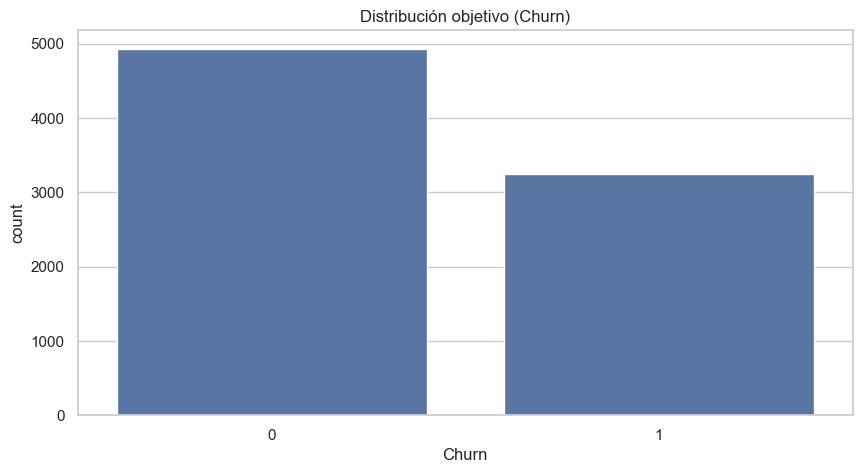

In [113]:
print('Target counts:')
print(df[TARGET].value_counts(dropna=False))
print('Target proportion:')
print(df[TARGET].value_counts(normalize=True))
sns.countplot(data=df, x=TARGET)
plt.title('Distribución objetivo (Churn)')
plt.show()

In [114]:
df_copy = df.copy()

In [115]:
df_copy= df_copy.drop(columns= ['Irregularidad_ActivoIrregular', 'Irregularidad_ActivoRegular', 'Irregularidad_BajaFinalIrregular', 'Irregularidad_BajaFinalRegular', 'VisitasCerrado', 'PropVisitasCerrado'])

In [116]:
df_copy

,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,TipoUltimoAbono,MesesDesdeUltimoAbono,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT,Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT,Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 30' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 60',Concepto_FISIO PACK BENVINGUDA,Concepto_FISIOTERÀPIA 60' ABONAT,Concepto_FISIOTERÀPIA 30' ABONAT,Concepto_NUTRI ANTROPOMETRIA,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra,NumRenovaciones,NumTiposAbono,TotalPagado,MediaPagada,TotalMetálico,TotalRecibo,TotalTarjeta,TotalTransferencia,CambioAbono,RatioMesesPagados,CefVarImporte,MesesDesdeUltimoPago,MesesDesdePrimerPago,DuracionRenovacionMeses,FormaPagoMayoritaria,TipoAbonoInicial,TipoAbonoFinal,TotalAbono_AA0,TotalAbono_AA00,TotalAbono_AA03,TotalAbono_AA12,TotalAbono_AC00,TotalAbono_AC03,TotalAbono_AF00,TotalAbono_AF03,TotalAbono_AG00,TotalAbono_AG03,TotalAbono_AG12,TotalAbono_AM00,TotalAbono_AM03,TotalAbono_AP00,TotalAbono_AP03,TotalAbono_AR00,TotalAbono_AR03,TotalAbono_AR12,TotalAbono_AT00,TotalAbono_AT01,TotalAbono_AVET,TotalAbono_CL04,TotalAbono_CR01,TotalAbono_CR03,TotalAbono_EMPF,TotalAbono_FA00,TotalAbono_FA12,TotalAbono_FM01,TotalAbono_JO00,TotalAbono_JO03,TotalAbono_MA00,TotalAbono_MA03,TotalAbono_MA06,TotalAbono_MA12,TotalAbono_NI00,TotalAbono_QM01,TotalAbono_QM03,TotalAbono_TEMP,TotalAbono_VIP,TipoAbonoFrecuente,NumCambiosAbono,TendenciaPago,TendenciaPagoMismoAbono,NumImpagosReales,NumReactivaciones,TienePagos,PagoSinSaltos_irregular,PagoSinSaltos_no_aplica,PagoSinSaltos_regular,TotalVisitas,DiasActivo,VisitasPorSemana,VisitasPorMes,MaxVisitasDia,VarVisitasMes,DuracionMediaTotal,DuracionStdTotal,DuracionMediaUlt90,DeltaDuracionUlt90VsTotal,PropVisitasLargas,VisitasUlt30,VisitasUlt90,VisitasUlt180,PropUlt90,DiasDesdeUltima,DiasHastaPrimera,StdDiasEntreVisitas,FrecuenciaModal,SemanasConVisita,SemanasTotales,SemanasConUnaVisita,MaxRachaSinVisita,MaxRachaConVisita,HoraMediaAcceso,HoraStdAcceso,VarDiasSemana,PropFindesemana,PropPrimavera,PropVerano,PropOtono,PropInvierno,VisitasFestivos,PropVisitasFestivos,VisitasFindesemana,PropVisitasFindesemana,VisitasRed9a14,PropVisitasRed9a14,VisitasRed7a20,PropVisitasRed7a20,VisitasRed7a15,PropVisitasRed7a15,TiempoActivoDias,VisitasPrimerTrimestre,VisitasUltimoTrimestre,DiaFav_domingo,DiaFav_jueves,DiaFav_lunes,DiaFav_martes,DiaFav_miércoles,DiaFav_sábado,DiaFav_viernes,EstFav_invierno,EstFav_otono,EstFav_primavera,EstFav_verano,TieneAccesos
0,334,82.0,False,0,69.81,AVET,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,True,True,False,False,3.0,3.0,1.500000,2.432432,1.0,0.00,50.422222,8.675597,50.422222,0.0,0.333333,3.0,3.0,3.0,1.0,383.0,9.0,1.500000,2.0,2.0,2.0,1.0,5.0,1.0,11.144444,0.452224,0.530612,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,3.0,False,False,False,True,False,Fal

In [117]:
list(df_copy.columns)

['IdPersona',
 'Edad',
 'Sexo_Mujer',
 'Churn',
 'AntiguedadAños',
 'TipoUltimoAbono',
 'MesesDesdeUltimoAbono',
 'Importe_2024_servicios',
 'Cantidad_2024_servicios',
 'Importe_2025_servicios',
 'Cantidad_2025_servicios',
 'Importe_total_pagado_servicios',
 'Cantidad_total_pagado_servicios',
 'Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT',
 'Concepto_ENTRENADOR PERSONAL 1 SESSIO',
 'Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT',
 'Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS)',
 'Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT',
 'Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT',
 'Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT',
 'Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT',
 "Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT",
 "Concepto_FISIO ABONAMENT 5 SESSIONS  30' ABONAT",
 "Concepto_FISIO ABONAMENT 5 SESSIONS  60'  ",
 'Concepto_FISIO PACK BENVINGUDA',
 "Concepto_FISIOTERÀPIA  60' ABONAT",
 "Concepto_FISIOTERÀPIA 30' ABONAT",
 'Concepto_NUTRI ANTROPOMETRIA',
 'Concept

In [118]:
# Evitar división por cero
df_copy['TotalPagado'] = df_copy['TotalPagado'].replace(0, np.nan)

# Proporciones por forma de pago
formas_pago = ['TotalMetálico', 'TotalRecibo', 'TotalTarjeta', 'TotalTransferencia']
for pago in formas_pago:
    df_copy[f'{pago}_prop'] = df_copy[pago] / df_copy['TotalPagado']

# Opcional: rellenar NaN con 0 (clientes sin pagos)
df_copy[[f'{p}_prop' for p in formas_pago]] = df_copy[[f'{p}_prop' for p in formas_pago]].fillna(0)

In [99]:
df_copy.drop(columns=formas_pago, inplace=True)

In [142]:
df_modelo = df_copy[['IdPersona','Edad', 'Sexo_Mujer', 'Churn', 'AntiguedadAños','MesesDesdeUltimoAbono',
#SERVICIOS EXTRA
'Importe_total_pagado_servicios',
 'Cantidad_total_pagado_servicios', 'Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT',
 'Concepto_ENTRENADOR PERSONAL 1 SESSIO',
 'Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT',
 'Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS)',
 'Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT',
 'Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT',
 'Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT',
 'Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT',
 "Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT",
 "Concepto_FISIO ABONAMENT 5 SESSIONS  30' ABONAT",
 "Concepto_FISIO ABONAMENT 5 SESSIONS  60'  ",
 'Concepto_FISIO PACK BENVINGUDA',
 "Concepto_FISIOTERÀPIA  60' ABONAT",
 "Concepto_FISIOTERÀPIA 30' ABONAT",
 'Concepto_NUTRI ANTROPOMETRIA',
 'Concepto_NUTRI ANTROPOMETRIA ABONAT',
 'Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT',
 'Concepto_NUTRI VISITA DE SEGUIMENT ABONAT',
 'Concepto_PACK 3 SEGUIMENTS ABONAT',
 'Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT',
 'TipoServicio_ENTRENAMENTS PERSONALS',
 'TipoServicio_FISIOTERÀPIA',
 'TipoServicio_NUTRICIÓ', 'Total_tipos_servicios_unicos',
 # PAGOS
   # 'NumRenovaciones',
    'NumTiposAbono',
    'TotalPagado',
#  'MediaPagada',
    'TotalMetálico_prop',
    'TotalRecibo_prop',
    'TotalTarjeta_prop',
    'TotalTransferencia_prop',
#  'CambioAbono',
#  'RatioMesesPagados',
#  'CefVarImporte', 'MesesDesdeUltimoPago',  'DuracionRenovacionMeses',
#  'NumCambiosAbono',
    'TendenciaPago',
#  'TendenciaPagoMismoAbono',
    'NumImpagosReales',
#  'NumReactivaciones',
    'TienePagos',
#  'PagoSinSaltos_irregular',
#  'PagoSinSaltos_no_aplica',
#  'PagoSinSaltos_regular',

#ACCEOS
'TotalVisitas',
 'DiasActivo',
 'VisitasPorSemana',
 'VisitasPorMes',
 'MaxVisitasDia',
 'VarVisitasMes',
 'DuracionMediaTotal',
 'DuracionStdTotal',
 'DuracionMediaUlt90',
 'DeltaDuracionUlt90VsTotal',
 'PropVisitasLargas',
 'VisitasUlt30',
 'VisitasUlt90',
 'VisitasUlt180',
 'PropUlt90',
 'DiasDesdeUltima',
 'DiasHastaPrimera',
 'StdDiasEntreVisitas',
 'FrecuenciaModal',
 'SemanasConVisita',
 'SemanasTotales',
 'SemanasConUnaVisita',
 'MaxRachaSinVisita',
 'MaxRachaConVisita',
 'HoraMediaAcceso',
 'HoraStdAcceso',
 'VarDiasSemana',
 'PropFindesemana',
 'PropPrimavera',
 'PropVerano',
 'PropOtono',
 'PropInvierno',
 'VisitasFestivos',
 'PropVisitasFestivos',
 'VisitasFindesemana',
 'PropVisitasFindesemana',
 'VisitasRed9a14',
 'PropVisitasRed9a14',
 'VisitasRed7a20',
 'PropVisitasRed7a20',
 'VisitasRed7a15',
 'PropVisitasRed7a15',
 'TiempoActivoDias',
 'VisitasPrimerTrimestre',
 'VisitasUltimoTrimestre',
 'DiaFav_domingo',
 'DiaFav_jueves',
 'DiaFav_lunes',
 'DiaFav_martes',
 'DiaFav_miércoles',
 'DiaFav_sábado',
 'DiaFav_viernes',
 'EstFav_invierno',
 'EstFav_otono',
 'EstFav_primavera',
 'EstFav_verano',
 'TieneAccesos'

]]

In [122]:
nulos = df_modelo.isnull().sum()
nulos[nulos > 0].sort_values(ascending=False)

TotalPagado    1842
dtype: int64

In [143]:
df_modelo= df_modelo.fillna(0)

In [124]:
df_modelo

,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,MesesDesdeUltimoAbono,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT,Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT,Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 30' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 60',Concepto_FISIO PACK BENVINGUDA,Concepto_FISIOTERÀPIA 60' ABONAT,Concepto_FISIOTERÀPIA 30' ABONAT,Concepto_NUTRI ANTROPOMETRIA,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_tipos_servicios_unicos,NumRenovaciones,NumTiposAbono,TotalPagado,MediaPagada,TotalMetálico_prop,TotalRecibo_prop,TotalTarjeta_prop,TotalTransferencia_prop,CambioAbono,RatioMesesPagados,CefVarImporte,MesesDesdeUltimoPago,DuracionRenovacionMeses,NumCambiosAbono,TendenciaPago,TendenciaPagoMismoAbono,NumImpagosReales,NumReactivaciones,TienePagos,PagoSinSaltos_irregular,PagoSinSaltos_no_aplica,PagoSinSaltos_regular
0,334,82.0,False,0,69.81,175.9,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,2.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,1.0,5.946124,0.0,0.0,0.0,1.0,0.0,True,True,False,False
1,452,85.0,False,0,69.00,839.5,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,2.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,1.0,5.946124,0.0,0.0,0.0,1.0,0.0,True,True,False,False
2,642,77.0,False,0,67.54,175.9,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,2.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,1.0,5.946124,0.0,0.0,0.0,1.0,0.0,True,True,False,False
3,849,85.0,False,0,67.12,816.7,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,1.0,1.0,9.00,9.00,0.0,1.0,0.0,0.0,0.0,0.083333,0.0,8.0,0.000000,0.0,0.0,0.0,0.0,0.0,True,False,False,True
4,891,78.0,False,0,66.70,175.9,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,2.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,1.0,5.946124,0.0,0.0,0.0,1.0,0.0,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,116944,11.0,True,1,1.10,2.2,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,1.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,True,False,False,True
8181,116981,17.0,False,1,0.09,0.8,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,False,False,True,False
8182,116987,23.0,False,1,0.08,1.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,False,False,True,False
8183,116996,17.0,False,1,1.00,2.0,0.0,0.0,False,False,False

In [144]:
# ============================================================
#  1. Preparación de datos
# ============================================================

# Separar características y objetivo
# y la columna objetivo es 'Churn'

X = df_modelo.drop(columns=['Churn', 'IdPersona'])
y = df_modelo['Churn']


# Dividir dataset (estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ============================================================
#  3. Escalado (solo para modelos que lo necesitan)
# ============================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================================
#  4. Modelos
# ============================================================
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# ============================================================
#  5. Entrenamiento y evaluación
# ============================================================
resultados = []

for nombre, modelo in modelos.items():
    inicio = time.time()

    # Escalar solo los modelos que lo necesitan
    if nombre in ["Regresión Logística", "SVM", "KNN"]:
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
        y_prob = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        y_prob = modelo.predict_proba(X_test)[:, 1]

    fin = time.time()

    auc = roc_auc_score(y_test, y_prob)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    resultados.append({
        "Modelo": nombre,
        "Accuracy": acc,
        "F1": f1,
        "AUC": auc,
        "Tiempo (s)": round(fin - inicio, 2)
    })

# ============================================================
# 📊 6. Resultados comparativos
# ============================================================
df_resultados = pd.DataFrame(resultados).sort_values(by="AUC", ascending=False)
df_resultados


,Modelo,Accuracy,F1,AUC,Tiempo (s)
2,Gradient Boosting,0.916870,0.893250,0.974598,10.46
1,Random Forest,0.886308,0.849515,0.957273,3.31
3,SVM,0.857579,0.814046,0.915192,6.70
0,Regresión Logística,0.842298,0.793269,0.909627,0.14
4,KNN,0.816626,0.765258,0.865138,0.08


In [ ]:
# --- 1️⃣ Creamos copia del dataset original
df_pred = df.copy()  # dataset original completo con IdPersona, Edad, Sexo, etc.

# --- 2️⃣ Preparamos features para predicción
X_all = df_pred.drop(columns=["Churn"])  # si Churn está en df
# Si hiciste one-hot encoding en entrenamiento, asegurarte de usar las mismas columnas
X_all_encoded = pd.get_dummies(X_all, drop_first=True)

# Añadimos columnas que falten (si alguna categoría no estaba en el train)
for col in X_train.columns:
    if col not in X_all_encoded.columns:
        X_all_encoded[col] = 0
X_all_encoded = X_all_encoded[X_train.columns]  # orden correcto de columnas

# --- 3️⃣ Predicción con Gradient Boosting (best_model)
y_prob_all = best_model.predict_proba(X_all_encoded)[:, 1]
y_pred_all = best_model.predict(X_all_encoded)

# --- 4️⃣ Creamos dataframe de comparación con info relevante
df_comparison = df_pred[["IdPersona", "Edad", "Sexo_Mujer", "AntiguedadAños", "Churn"]].copy()
df_comparison["Churn_Pred"] = y_pred_all
df_comparison["Churn_Prob"] = y_prob_all

# --- 5️⃣ Revisamos primeras filas
print("\nPredicciones sobre todo el dataset:\n", df_comparison.head())

# --- 5️⃣ Métricas generales sobre todo el dataset
from sklearn.metrics import confusion_matrix

print("\nAccuracy:", accuracy_score(y_all, y_pred_all))
print("F1:", f1_score(y_all, y_pred_all))
print("AUC:", roc_auc_score(y_all, y_prob_all))
print("\nConfusion matrix:\n", confusion_matrix(y_all, y_pred_all))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Dividir train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Identificar tipos
num_cols = ['Edad', 'AntiguedadAños', 'TotalPagado', 'Importe_total_pagado_servicios', 'TotalVisitas']
bool_cols = ['Sexo_Mujer', 'UsoServiciosExtra', 'TienePagos', 'TieneAccesos']

# Transformador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('bool', 'passthrough', bool_cols)
    ]
)